# **Trial Neural Network Regression Model**
This model runs my trial for House Price Data in King City. The data has been downloaded from Kaggle.
The model has been processed with:
1.   There is no null data
2.   The Date feature data type changed from string to DateTime. Then create a new feature year and month. The original Date is deleted.
3.   The top 1% of data with the highest price value is deleted
4. To remove all outliers, use zscore to remove all data that has scored higher than 3
5. As lots of data are removed, I dropped another feature waterfront and yr_renovated
6. The skewness of the data is reduced. And I don't apply another transform process except for standard scaler
7. I try to look into the correlation between each feature. After plotting some visualization, I saw that even tho the correlation is small there are patterns between the dependent variable and independent variable so I try to create the model without dropping another feature.

**Note from this trial**

First, I created a simple model with the total of neuron number is the total number of the features in the X data plus 1 for bias. The model loss with few epochs is too small so I try to increase the complexity of the model.

After I increase the complexity, I saw that the training loss is decreasing for each model. I don't see a separation between training and testing loss value in a few models early. So i don't apply regularization in the model.

But after a few trials, i don't reach my targeted value of RMSE loss with a value of less than 50k. So I tried to increase the model, when my model training loss value reach 70k ish i saw that the separation is beginning to appear. The model is beginning to overfit. Then I applied some regularization.

In the last few models I created, I know that my model is starting to get very complex as the running time is way longer than before. Because this notebook is a trial so i don't limit my model running time. In my last model, i saw that the training loss is still decreasing with 500 epochs. I'm thinking to go more complex with this base model. Then i will put more regularization.

I thought that the ideal model from this trial is the model that i created in the middle. Because the running time is good and the loss value between training and test is very small. The trial for this time is ended here. I got some insight with testing the number of layers, neurons, regularization, and some optimizers here. Next trial, I target the loss value from both training and test models lower than 50k ish. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [ ]:
df = df.drop('date', axis=1)

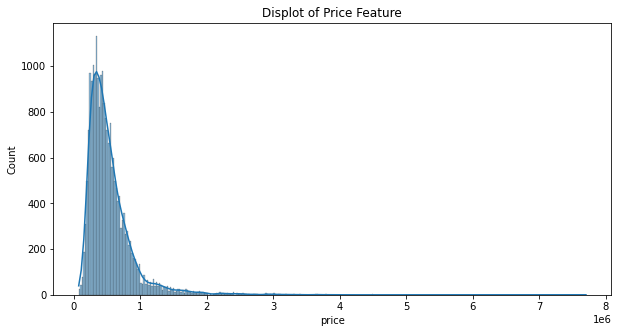

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True)
plt.title('Displot of Price Feature');


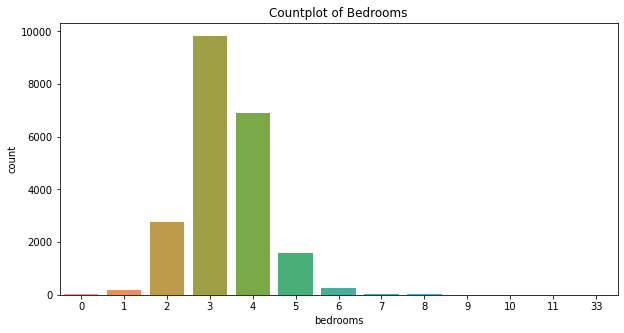

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='bedrooms', data = df)
plt.title('Countplot of Bedrooms');

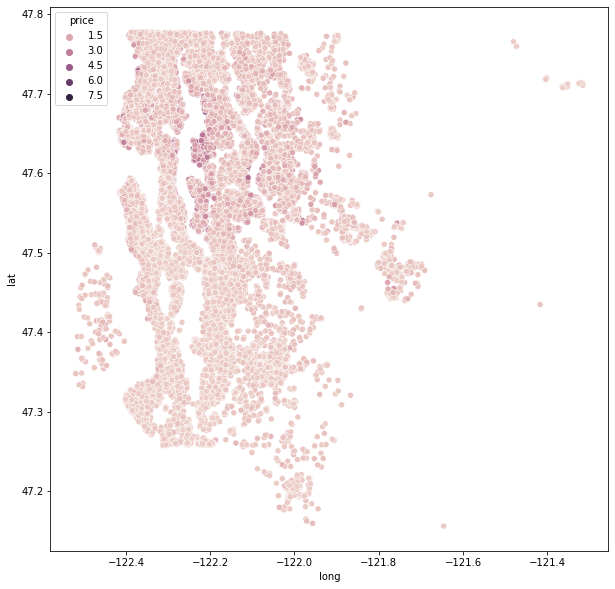

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df);

In [ ]:
drop_top_1p = df.sort_values('price',ascending=False).iloc[int(round(len(df)*0.01,0)):]

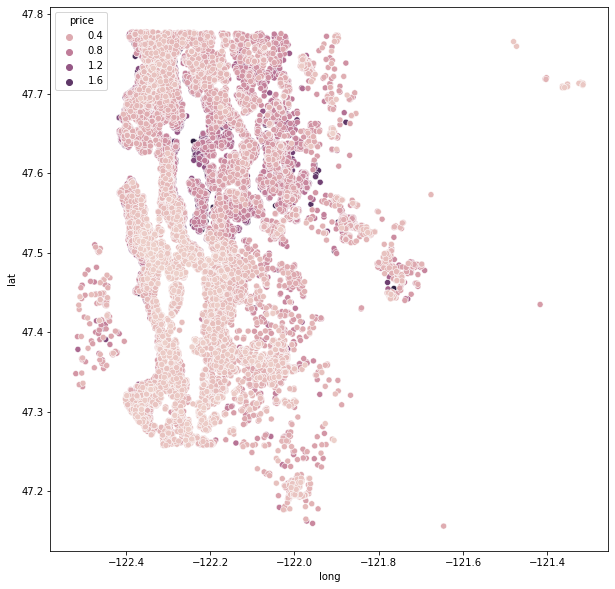

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='price', data=drop_top_1p);

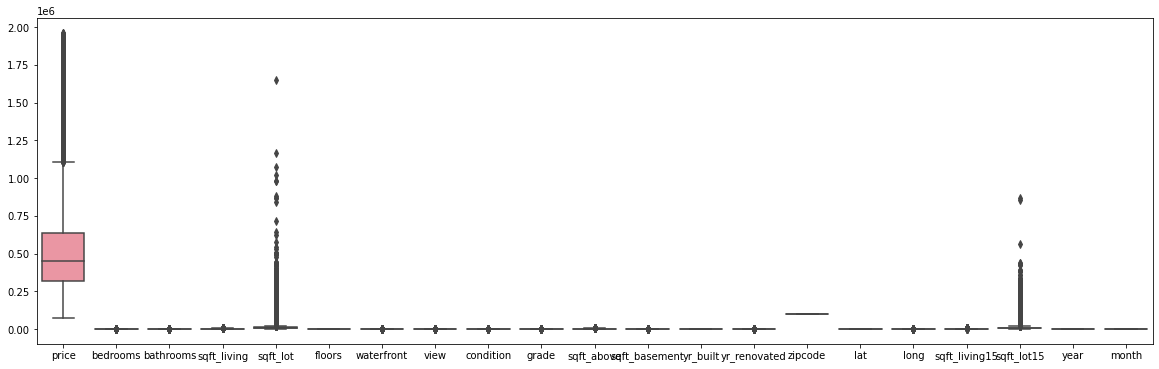

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=drop_top_1p)

In [ ]:
df.shape

(21613, 21)

In [ ]:
from scipy.stats import zscore

In [ ]:
df_2 = drop_top_1p.copy()

In [ ]:
z_scores = zscore(df_2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_inlier = df_2[filtered_entries]

In [ ]:
df_inlier.shape

(18502, 21)

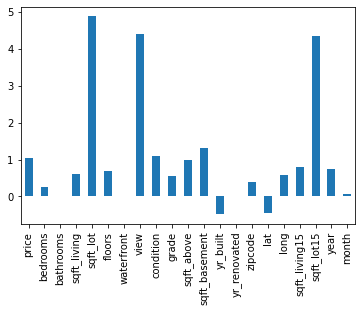

In [ ]:
df_inlier.skew().plot(kind='bar');

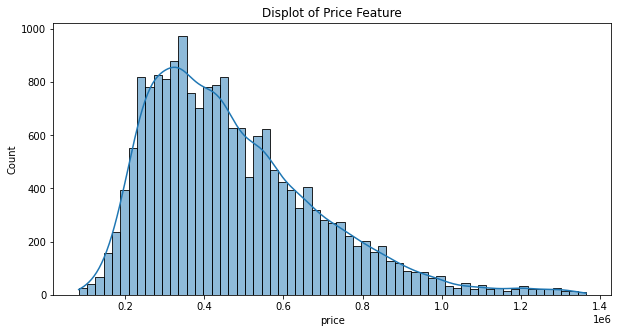

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_inlier['price'], kde=True)
plt.title('Displot of Price Feature');


In [ ]:
df_inlier = df_inlier.drop('zipcode', axis=1)

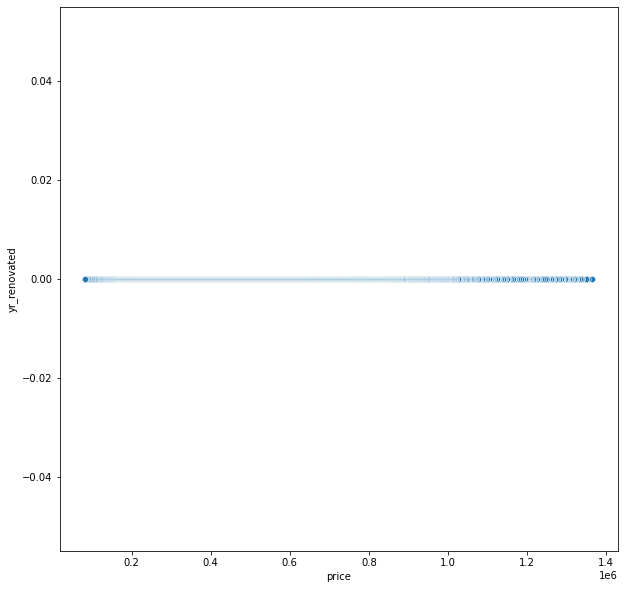

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='price', y='yr_renovated', data=df_inlier);

In [ ]:
df_inlier.describe().T

,count,mean,std,min,25%,50%,75%,max
price,18502.0,472577.237001,215133.795191,82000.0000,310000.0000,430000.0000,590000.000000,1.365000e+06
bedrooms,18502.0,3.314020,0.844660,1.0000,3.0000,3.0000,4.000000,6.000000e+00
bathrooms,18502.0,2.027659,0.680657,0.0000,1.5000,2.0000,2.500000,4.250000e+00
sqft_living,18502.0,1931.744622,719.937315,370.0000,1390.0000,1830.0000,2390.000000,4.600000e+03
sqft_lot,18502.0,9739.315479,11265.624620,520.0000,5000.0000,7350.0000,9836.500000,1.372140e+05
floors,18502.0,1.478327,0.539996,1.0000,1.0000,1.0000,2.000000,3.000000e+00
waterfront,18502.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000e+00
view,18502.0,0.089125,0.395370,0.0000,0.0000,0.0000,0.000000,2.000000e+00
condition,18502.0,3.422603,0.647834,2.0000,3.0000,3.0000,4.000000,5.000000e+00
grade,18502.0,7.515350,1.005126,5.0000,7.0000,7.0000,8.000000,1.100000e+01


In [ ]:
df_inlier = df_inlier.drop(columns=['waterfront', 'yr_renovated'])

In [ ]:
df_inlier.corr()['price'].sort_values()

month           -0.017742
year             0.010138
condition        0.052746
yr_built         0.059647
long             0.083658
sqft_lot15       0.089055
sqft_lot         0.098861
view             0.181831
sqft_basement    0.204818
floors           0.273530
bedrooms         0.294012
bathrooms        0.429408
lat              0.445543
sqft_above       0.519728
sqft_living15    0.548518
sqft_living      0.609877
grade            0.623999
price            1.000000
Name: price, dtype: float64

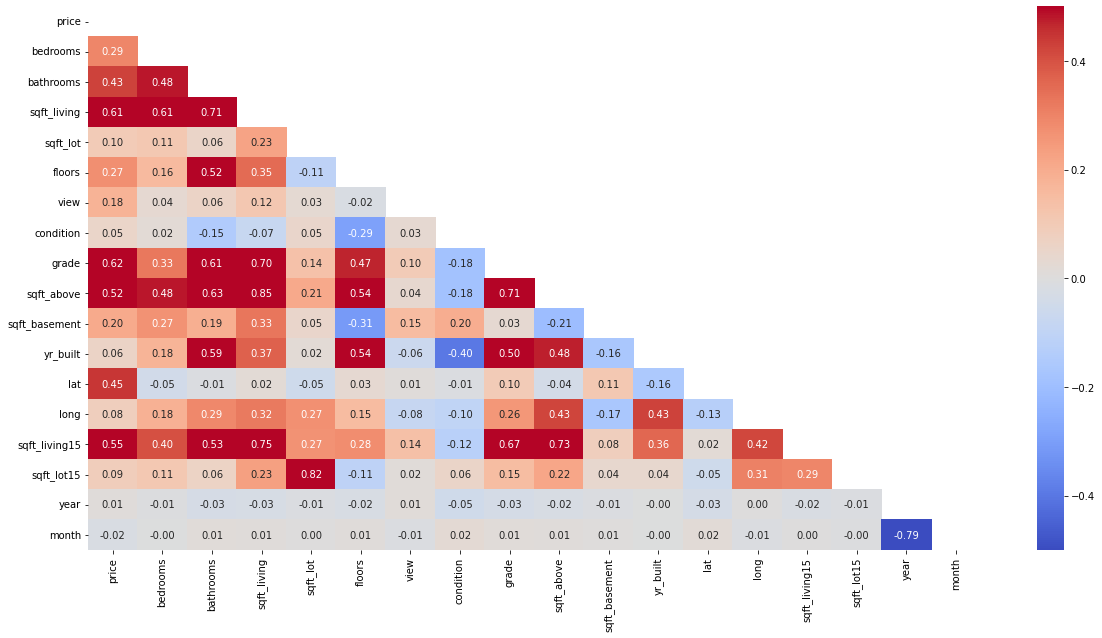

In [ ]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(df_inlier.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_inlier.corr(), mask=mask, annot=True, fmt='.2f', center = 0, vmax=0.5, vmin=-0.5,
            cmap = sns.color_palette("coolwarm", as_cmap=True))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_inlier.drop('price', axis=1)

In [ ]:
y = df_inlier['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
S = StandardScaler()
X_train_s = S.fit_transform(X_train)
X_test_s = S.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
#Custom Loss for Keras using RMSE
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
model_1.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_1 = model_1.fit(X_train_s, y_train, batch_size=256, epochs=100, verbose=0, validation_data=(X_test_s, y_test))

In [ ]:
def visualize_train_test(model, value = 'loss'):
  value2 = "val_" + str(value)
  fig = plt.figure(figsize=(12,8))
  plt.xlabel('Epochs')
  plt.ylabel(value)
  plt.plot(model.history[value], label='training', c='red')
  plt.plot(model.history["val_"+value], label='validation', c='blue')
  plt.legend()
  return

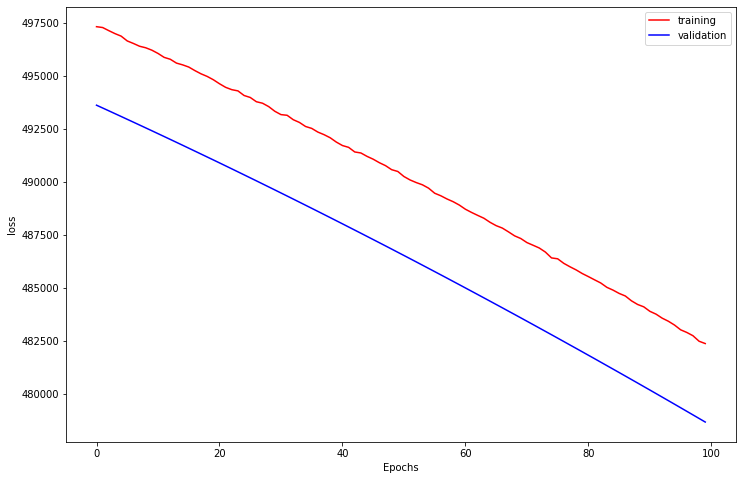

In [ ]:
visualize_train_test(history_1, 'loss');

In [ ]:
model_2 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_2.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_2 = model_2.fit(X_train_s, y_train, batch_size=256, epochs=100, verbose=0, validation_data=(X_test_s, y_test))

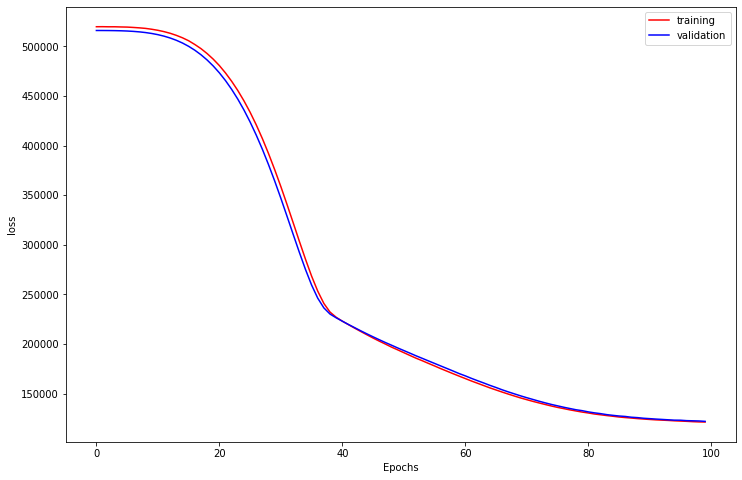

In [ ]:
visualize_train_test(history_2, 'loss');

In [ ]:
model_3 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_3.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_3 = model_3.fit(X_train_s, y_train, batch_size=256, epochs=100, verbose=0, validation_data=(X_test_s, y_test))

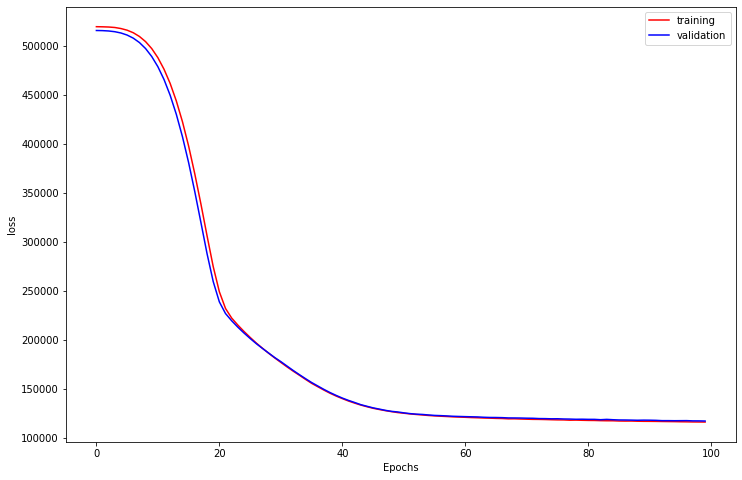

In [ ]:
visualize_train_test(history_3, 'loss')

In [ ]:
model_4 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_4.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_4 = model_4.fit(X_train_s, y_train, batch_size=256, epochs=100, verbose=0, validation_data=(X_test_s, y_test))

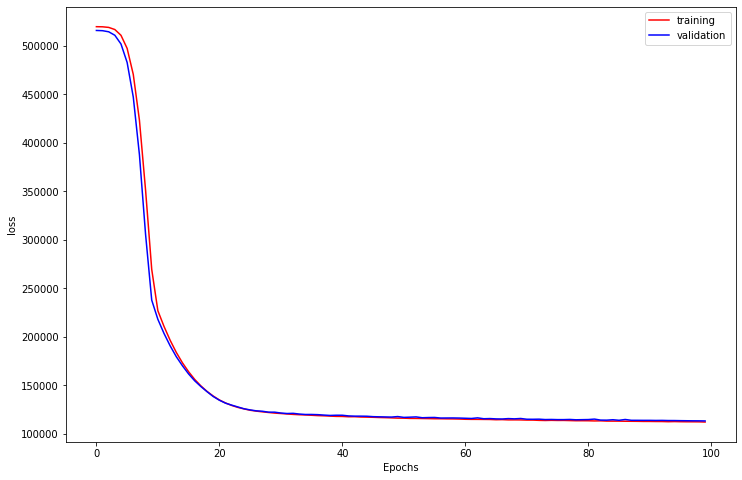

In [ ]:
visualize_train_test(history_4, 'loss')

In [ ]:
model_5 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_5.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_5 = model_5.fit(X_train_s, y_train, batch_size=256, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

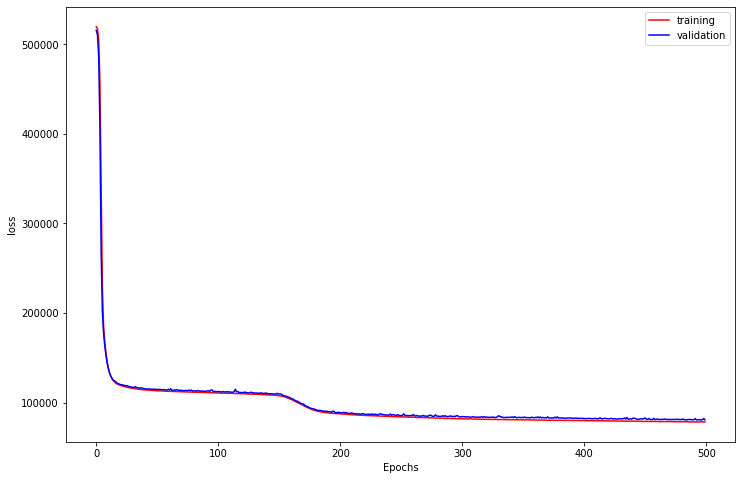

In [ ]:
visualize_train_test(history_5, 'loss')

In [ ]:
model_6 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(57, activation='relu'),
                tf.keras.layers.Dense(57, activation='relu'),
                tf.keras.layers.Dense(57, activation='relu'),
                tf.keras.layers.Dense(57, activation='relu'),
                tf.keras.layers.Dense(57, activation='relu'),
                tf.keras.layers.Dense(57, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_6.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_6 = model_6.fit(X_train_s, y_train, batch_size=256, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

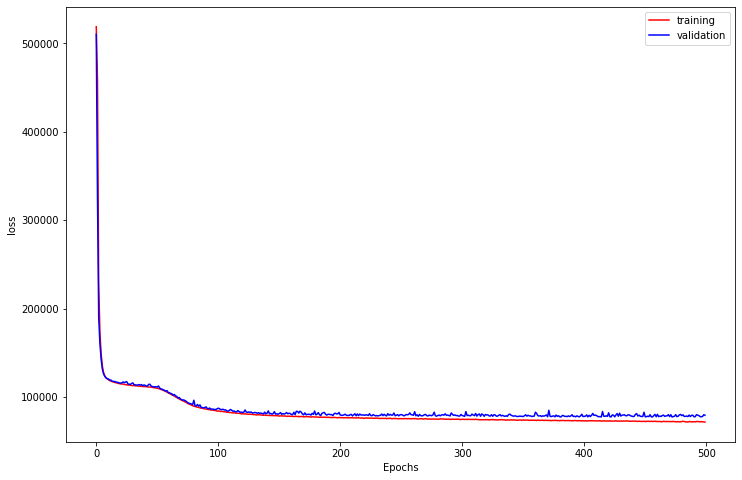

In [ ]:
visualize_train_test(history_6, 'loss')

In [ ]:
model_7 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(19, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_7.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_7 = model_7.fit(X_train_s, y_train, batch_size=512, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

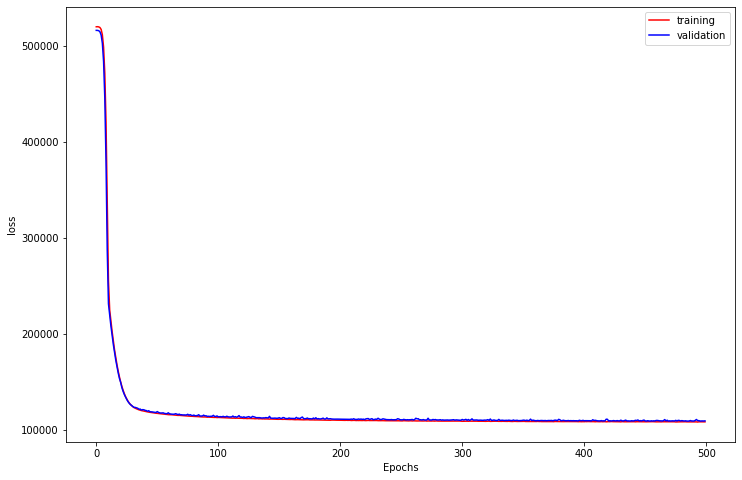

In [ ]:
visualize_train_test(history_7, 'loss')

In [ ]:
print("Compare Result")
print('---------------')
print("Model 1 Val_loss\t: {0:.2f}".format(min(history_1.history['val_loss'])))
print("Model 2 Val_loss\t: {0:.2f}".format(min(history_2.history['val_loss'])))
print("Model 3 Val_loss\t: {0:.2f}".format(min(history_3.history['val_loss'])))
print("Model 4 Val_loss\t: {0:.2f}".format(min(history_4.history['val_loss'])))
print("Model 5 Val_loss\t: {0:.2f}".format(min(history_5.history['val_loss'])))
print("Model 6 Val_loss\t: {0:.2f}".format(min(history_6.history['val_loss'])))
print("Model 7 Val_loss\t: {0:.2f}".format(min(history_7.history['val_loss'])))

Compare Result
---------------
Model 1 Val_loss	: 478673.06
Model 2 Val_loss	: 121957.90
Model 3 Val_loss	: 116840.64
Model 4 Val_loss	: 113439.04
Model 5 Val_loss	: 80596.61
Model 6 Val_loss	: 77196.28
Model 7 Val_loss	: 109431.07


In [ ]:
print("Compare Result")
print('---------------')
print("Model 1 loss\t: {0:.2f}".format(min(history_1.history['loss'])))
print("Model 2 loss\t: {0:.2f}".format(min(history_2.history['loss'])))
print("Model 3 loss\t: {0:.2f}".format(min(history_3.history['loss'])))
print("Model 4 loss\t: {0:.2f}".format(min(history_4.history['loss'])))
print("Model 5 loss\t: {0:.2f}".format(min(history_5.history['loss'])))
print("Model 6 loss\t: {0:.2f}".format(min(history_6.history['loss'])))
print("Model 7 loss\t: {0:.2f}".format(min(history_7.history['loss'])))

Compare Result
---------------
Model 1 loss	: 482372.25
Model 2 loss	: 121280.27
Model 3 loss	: 115817.20
Model 4 loss	: 112308.21
Model 5 loss	: 78358.25
Model 6 loss	: 71530.05
Model 7 loss	: 108464.55


In [ ]:
model_8 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_8.compile(optimizer='rmsprop', loss=root_mean_squared_error)

In [ ]:
history_8 = model_8.fit(X_train_s, y_train, batch_size=512, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

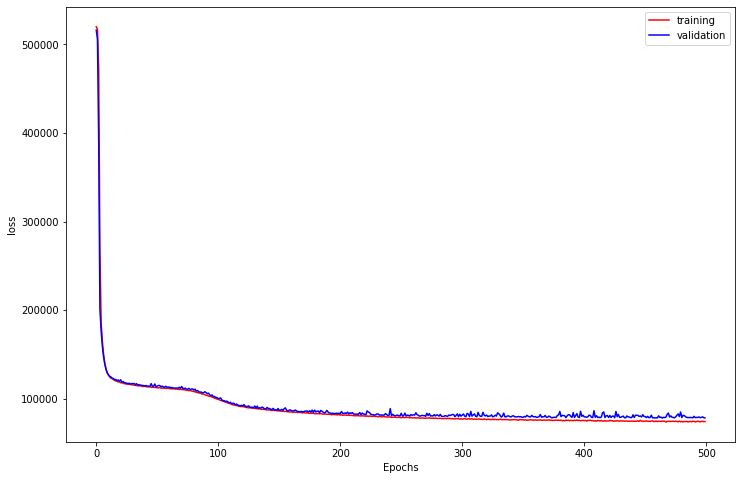

In [ ]:
visualize_train_test(history_8, 'loss')

In [ ]:
model_9 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(38, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model_9.compile(optimizer='adam', loss=root_mean_squared_error)

In [ ]:
history_9 = model_9.fit(X_train_s, y_train, batch_size=512, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

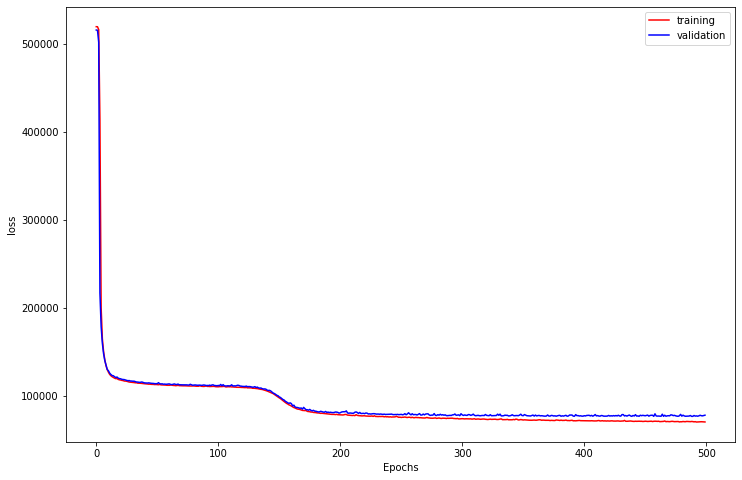

In [ ]:
visualize_train_test(history_9, 'loss')

In [ ]:
model_10 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(76, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(1, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
])

In [ ]:
model_10.compile(optimizer='adam', loss=root_mean_squared_error, metrics=['accuracy'])

In [ ]:
history_10 = model_10.fit(X_train_s, y_train, batch_size=512, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

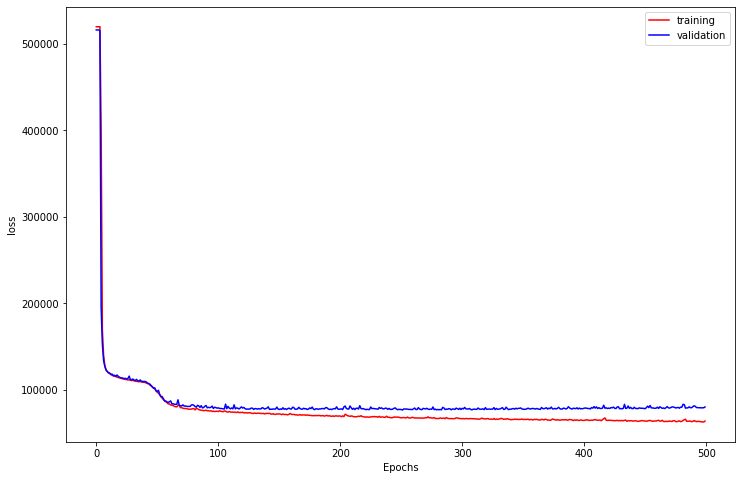

In [ ]:
visualize_train_test(history_10, 'loss')

In [ ]:
model_11 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
model_11.compile(optimizer='adam', loss=root_mean_squared_error, metrics=['accuracy'])

In [ ]:
history_11 = model_11.fit(X_train_s, y_train, batch_size=512, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

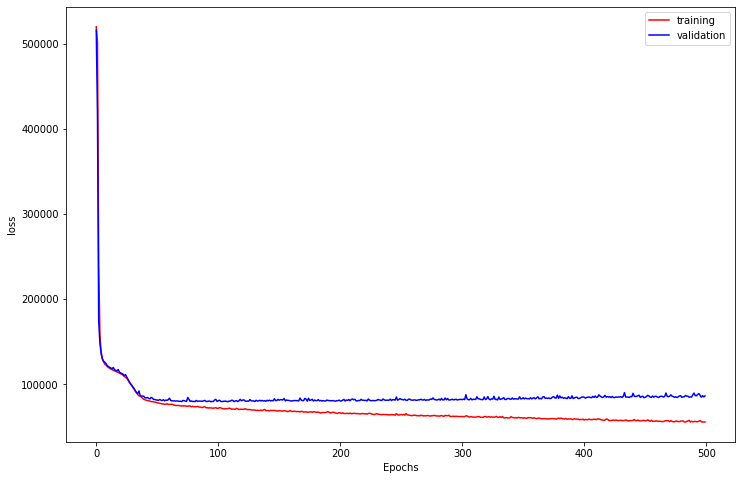

In [ ]:
visualize_train_test(history_11, 'loss')

In [ ]:
print("Compare Result Val_loss")
print('---------------')
print("Model 1 Val_loss\t: {0:.2f}".format(min(history_1.history['val_loss'])))
print("Model 2 Val_loss\t: {0:.2f}".format(min(history_2.history['val_loss'])))
print("Model 3 Val_loss\t: {0:.2f}".format(min(history_3.history['val_loss'])))
print("Model 4 Val_loss\t: {0:.2f}".format(min(history_4.history['val_loss'])))
print("Model 5 Val_loss\t: {0:.2f}".format(min(history_5.history['val_loss'])))
print("Model 6 Val_loss\t: {0:.2f}".format(min(history_6.history['val_loss'])))
print("Model 7 Val_loss\t: {0:.2f}".format(min(history_7.history['val_loss'])))
print("Model 8 Val_loss\t: {0:.2f}".format(min(history_8.history['val_loss'])))
print("Model 9 Val_loss\t: {0:.2f}".format(min(history_9.history['val_loss'])))
print("Model 10 Val_loss\t: {0:.2f}".format(min(history_10.history['val_loss'])))
print("Model 11 Val_loss\t: {0:.2f}".format(min(history_11.history['val_loss'])))
print('\n')
print('\n')
print("Compare Result Loss")
print('---------------')
print("Model 1 loss\t: {0:.2f}".format(min(history_1.history['loss'])))
print("Model 2 loss\t: {0:.2f}".format(min(history_2.history['loss'])))
print("Model 3 loss\t: {0:.2f}".format(min(history_3.history['loss'])))
print("Model 4 loss\t: {0:.2f}".format(min(history_4.history['loss'])))
print("Model 5 loss\t: {0:.2f}".format(min(history_5.history['loss'])))
print("Model 6 loss\t: {0:.2f}".format(min(history_6.history['loss'])))
print("Model 7 loss\t: {0:.2f}".format(min(history_7.history['loss'])))
print("Model 8 loss\t: {0:.2f}".format(min(history_8.history['loss'])))
print("Model 9 loss\t: {0:.2f}".format(min(history_9.history['loss'])))
print("Model 10 loss\t: {0:.2f}".format(min(history_10.history['loss'])))
print("Model 11 loss\t: {0:.2f}".format(min(history_11.history['loss'])))

Compare Result Val_loss
---------------
Model 1 Val_loss	: 478673.06
Model 2 Val_loss	: 121957.90
Model 3 Val_loss	: 116840.64
Model 4 Val_loss	: 113439.04
Model 5 Val_loss	: 80596.61
Model 6 Val_loss	: 77196.28
Model 7 Val_loss	: 109431.07
Model 8 Val_loss	: 78355.04
Model 9 Val_loss	: 76674.73
Model 10 Val_loss	: 76880.84
Model 11 Val_loss	: 79513.92




Compare Result Loss
---------------
Model 1 loss	: 482372.25
Model 2 loss	: 121280.27
Model 3 loss	: 115817.20
Model 4 loss	: 112308.21
Model 5 loss	: 78358.25
Model 6 loss	: 71530.05
Model 7 loss	: 108464.55
Model 8 loss	: 73862.45
Model 9 loss	: 70211.12
Model 10 loss	: 62990.16
Model 11 loss	: 55645.09


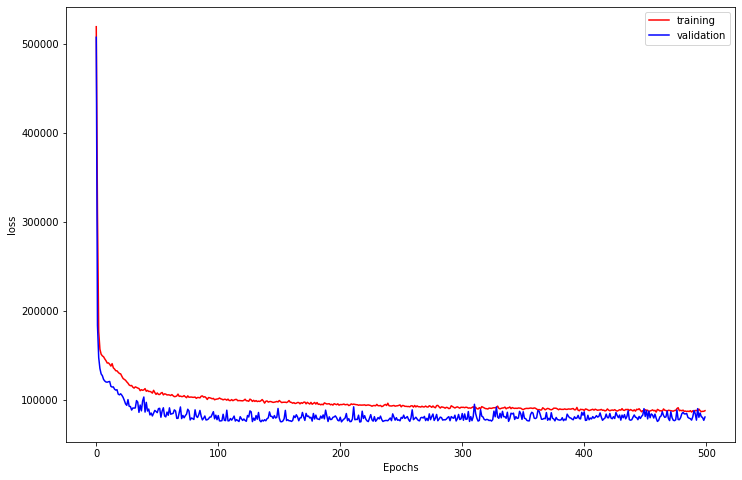

In [ ]:
model_12 = tf.keras.models.Sequential([
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(114, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
                tf.keras.layers.Dropout(0.15),
                tf.keras.layers.Dense(1, activation='relu')
])

model_12.compile(optimizer='adam', loss=root_mean_squared_error, metrics=['accuracy'])

history_12 = model_12.fit(X_train_s, y_train, batch_size=512, epochs=500, verbose=0, validation_data=(X_test_s, y_test))

visualize_train_test(history_12, 'loss')

In [ ]:
print("Compare Result Val_loss")
print('---------------')
print("Model 1 Val_loss\t: {0:.2f}".format(min(history_1.history['val_loss'])))
print("Model 2 Val_loss\t: {0:.2f}".format(min(history_2.history['val_loss'])))
print("Model 3 Val_loss\t: {0:.2f}".format(min(history_3.history['val_loss'])))
print("Model 4 Val_loss\t: {0:.2f}".format(min(history_4.history['val_loss'])))
print("Model 5 Val_loss\t: {0:.2f}".format(min(history_5.history['val_loss'])))
print("Model 6 Val_loss\t: {0:.2f}".format(min(history_6.history['val_loss'])))
print("Model 7 Val_loss\t: {0:.2f}".format(min(history_7.history['val_loss'])))
print("Model 8 Val_loss\t: {0:.2f}".format(min(history_8.history['val_loss'])))
print("Model 9 Val_loss\t: {0:.2f}".format(min(history_9.history['val_loss'])))
print("Model 10 Val_loss\t: {0:.2f}".format(min(history_10.history['val_loss'])))
print("Model 11 Val_loss\t: {0:.2f}".format(min(history_11.history['val_loss'])))
print("Model 12 Val_loss\t: {0:.2f}".format(min(history_12.history['val_loss'])))
print('\n')
print('\n')
print("Compare Result Loss")
print('---------------')
print("Model 1 loss\t: {0:.2f}".format(min(history_1.history['loss'])))
print("Model 2 loss\t: {0:.2f}".format(min(history_2.history['loss'])))
print("Model 3 loss\t: {0:.2f}".format(min(history_3.history['loss'])))
print("Model 4 loss\t: {0:.2f}".format(min(history_4.history['loss'])))
print("Model 5 loss\t: {0:.2f}".format(min(history_5.history['loss'])))
print("Model 6 loss\t: {0:.2f}".format(min(history_6.history['loss'])))
print("Model 7 loss\t: {0:.2f}".format(min(history_7.history['loss'])))
print("Model 8 loss\t: {0:.2f}".format(min(history_8.history['loss'])))
print("Model 9 loss\t: {0:.2f}".format(min(history_9.history['loss'])))
print("Model 10 loss\t: {0:.2f}".format(min(history_10.history['loss'])))
print("Model 11 loss\t: {0:.2f}".format(min(history_11.history['loss'])))
print("Model 12 loss\t: {0:.2f}".format(min(history_12.history['loss'])))

Compare Result Val_loss
---------------
Model 1 Val_loss	: 478673.06
Model 2 Val_loss	: 121957.90
Model 3 Val_loss	: 116840.64
Model 4 Val_loss	: 113439.04
Model 5 Val_loss	: 80596.61
Model 6 Val_loss	: 77196.28
Model 7 Val_loss	: 109431.07
Model 8 Val_loss	: 78355.04
Model 9 Val_loss	: 76674.73
Model 10 Val_loss	: 76880.84
Model 11 Val_loss	: 79513.92
Model 12 Val_loss	: 74992.16




Compare Result Loss
---------------
Model 1 loss	: 482372.25
Model 2 loss	: 121280.27
Model 3 loss	: 115817.20
Model 4 loss	: 112308.21
Model 5 loss	: 78358.25
Model 6 loss	: 71530.05
Model 7 loss	: 108464.55
Model 8 loss	: 73862.45
Model 9 loss	: 70211.12
Model 10 loss	: 62990.16
Model 11 loss	: 55645.09
Model 12 loss	: 86141.07
